In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
raw_df = pd.read_csv('Life Expectancy Data.csv',na_values=np.NaN)
df = raw_df.copy()
df.head(2)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [6]:
raw_df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [9]:
for col in df.columns:
    print(col,':',(df[col].isna().sum() / len(df[col])) * 100)

Country : 0.0
Year : 0.0
Status : 0.0
Life_expectancy : 0.3403675970047651
Adult_Mortality : 0.3403675970047651
infant_deaths : 0.0
Alcohol : 6.603131381892443
percentage_expenditure : 0.0
Hepatitis_B : 18.82232811436351
Measles : 0.0
BMI : 1.1572498298162015
under-five_deaths : 0.0
Polio : 0.6466984343090538
Total_expenditure : 7.6923076923076925
Diphtheria : 0.6466984343090538
HIV/AIDS : 0.0
GDP : 15.248468345813478
Population : 22.19196732471069
thinness__1-19_years : 1.1572498298162015
thinness_5-9_years : 1.1572498298162015
Income_composition_of_resources : 5.684138869979578
Schooling : 5.547991831177672


In [10]:
df.dropna(subset=['BMI'],axis=0,inplace=True)

In [11]:
df.shape

(2904, 22)

In [12]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      8
Adult_Mortality                      8
infant_deaths                        0
Alcohol                            177
percentage_expenditure               0
Hepatitis_B                        533
Measles                              0
BMI                                  0
under-five_deaths                    0
Polio                                8
Total_expenditure                  212
Diphtheria                           8
HIV/AIDS                             0
GDP                                438
Population                         650
thinness__1-19_years                 0
thinness_5-9_years                   0
Income_composition_of_resources    165
Schooling                          162
dtype: int64

In [13]:
print('Minimum Life Expectancy :',df['Life_expectancy'].min())
print('Maximum Life Expectancy :',df['Life_expectancy'].max())

Minimum Life Expectancy : 36.3
Maximum Life Expectancy : 89.0


In [14]:
df.shape

(2904, 22)

In [15]:
df[df.Hepatitis_B == df.Polio].shape

(828, 22)

In [16]:
df_difference = pd.DataFrame()
df_difference['Hepatitis_B'] = df['Hepatitis_B']
df_difference['Polio'] = df['Polio']
df_difference['difference'] = abs(df['Hepatitis_B'] - df['Polio'])

df_difference[(df_difference['difference'] > 0) & (df_difference['difference'] < 10)]

,Hepatitis_B,Polio,difference
1,62.0,58.0,4.0
2,64.0,62.0,2.0
9,64.0,58.0,6.0
10,66.0,58.0,8.0
24,98.0,99.0,1.0
...,...,...,...
2930,72.0,73.0,1.0
2931,68.0,71.0,3.0
2932,65.0,69.0,4.0
2933,68.0,67.0,1.0


In [17]:
df.Hepatitis_B.fillna(0,inplace=True)

Hepatitis_B = []
for index,row in df.iterrows():
    if row['Hepatitis_B'] == 0:
        Hepatitis_B.append(row['Polio'])
    else:
        Hepatitis_B.append(row['Hepatitis_B'])

df.Hepatitis_B = Hepatitis_B

In [18]:
df.Alcohol.fillna(0,inplace=True)

Alcohol = []
for country in df.Country.unique():
    temp_df = df[df.Country == country]
    Alcohol_mean = temp_df.Alcohol.mean()
    for index,row in temp_df.iterrows():
        if row['Alcohol'] == 0:
            Alcohol.append(Alcohol_mean)
        else:
            Alcohol.append(row['Alcohol'])

df.Alcohol = Alcohol

In [19]:
df.GDP.fillna(0,inplace=True)

GDP = []
for country in df.Country.unique():
    temp_df = df[df.Country == country]
    GDP_mean = temp_df.GDP.mean()
    for index,row in temp_df.iterrows():
        if row['GDP'] == 0:
            GDP.append(GDP_mean)
        else:
            GDP.append(row['GDP'])

df.GDP = GDP

In [20]:
df.Population.fillna(0,inplace=True)

Population = []
for country in df.Country.unique():
    temp_df = df[df.Country == country]
    Population_mean = temp_df.Population.mean()
    for index,row in temp_df.iterrows():
        if row['Population'] == 0:
            Population.append(Population_mean)
        else:
            Population.append(row['Population'])

df.Population = Population

<AxesSubplot:>

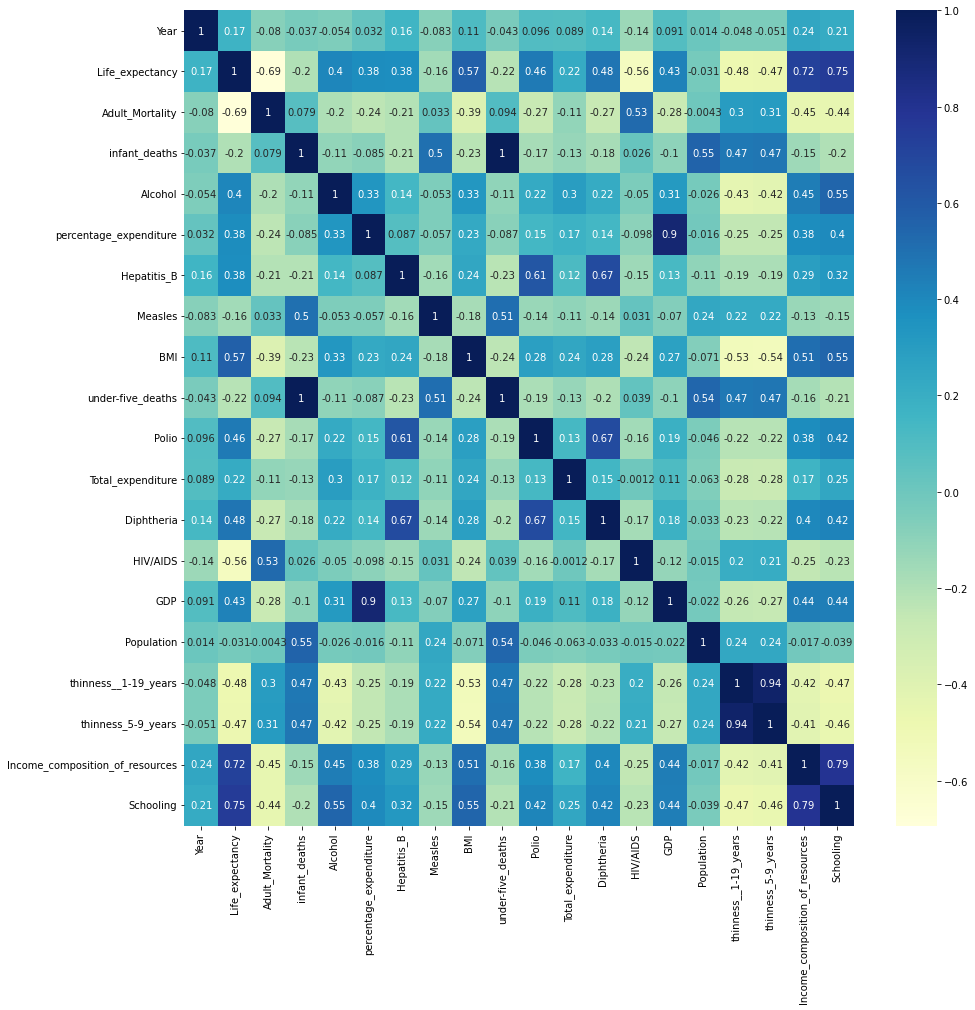

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [22]:
df.drop(columns=['Year','Status'],axis=1,inplace=True)

In [23]:
df.isna().sum()

Country                              0
Life_expectancy                      8
Adult_Mortality                      8
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          8
Measles                              0
BMI                                  0
under-five_deaths                    0
Polio                                8
Total_expenditure                  212
Diphtheria                           8
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness__1-19_years                 0
thinness_5-9_years                   0
Income_composition_of_resources    165
Schooling                          162
dtype: int64

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.isnull().sum()

Country                            0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

<AxesSubplot:>

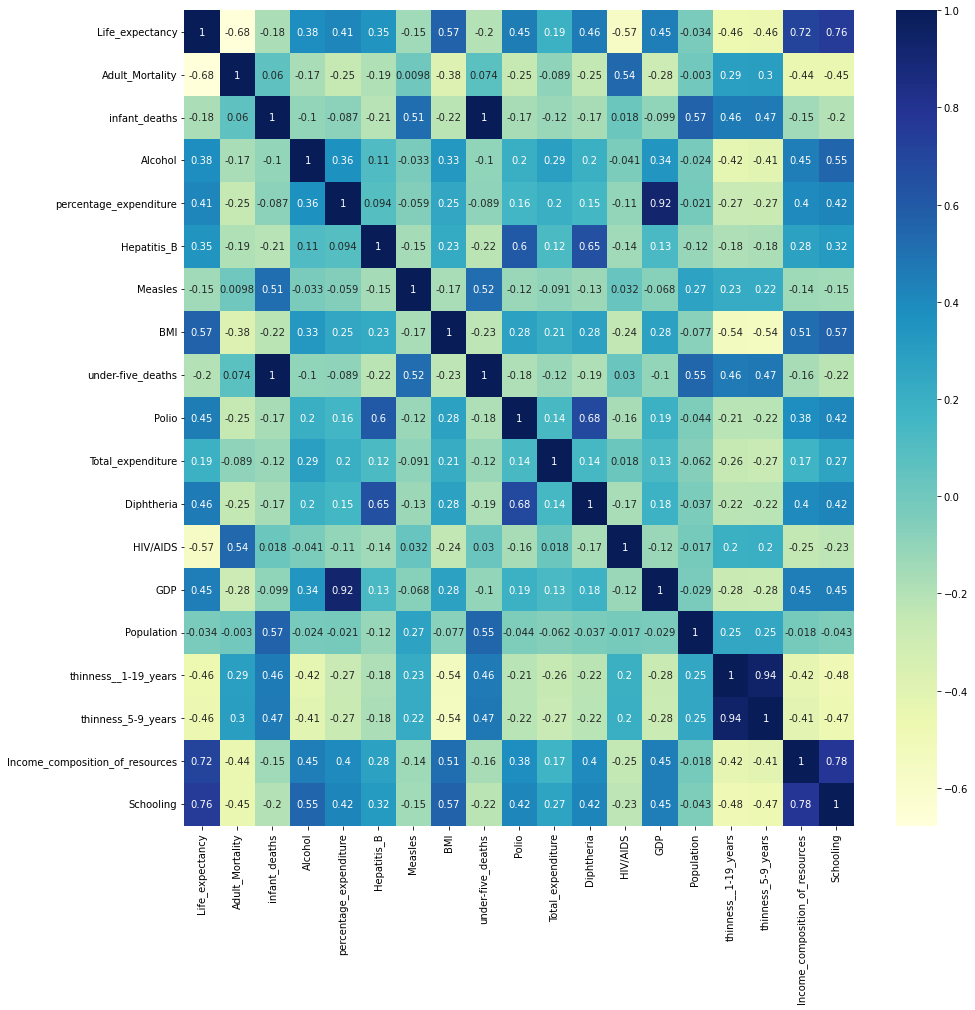

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df['Country'])
df['Country'] = le.transform(df['Country'])


In [28]:
X = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape

((2044, 19), (512, 19))

In [30]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(X_train, 0.75)
corr_features

{'GDP', 'Schooling', 'thinness_5-9_years', 'under-five_deaths'}

In [32]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

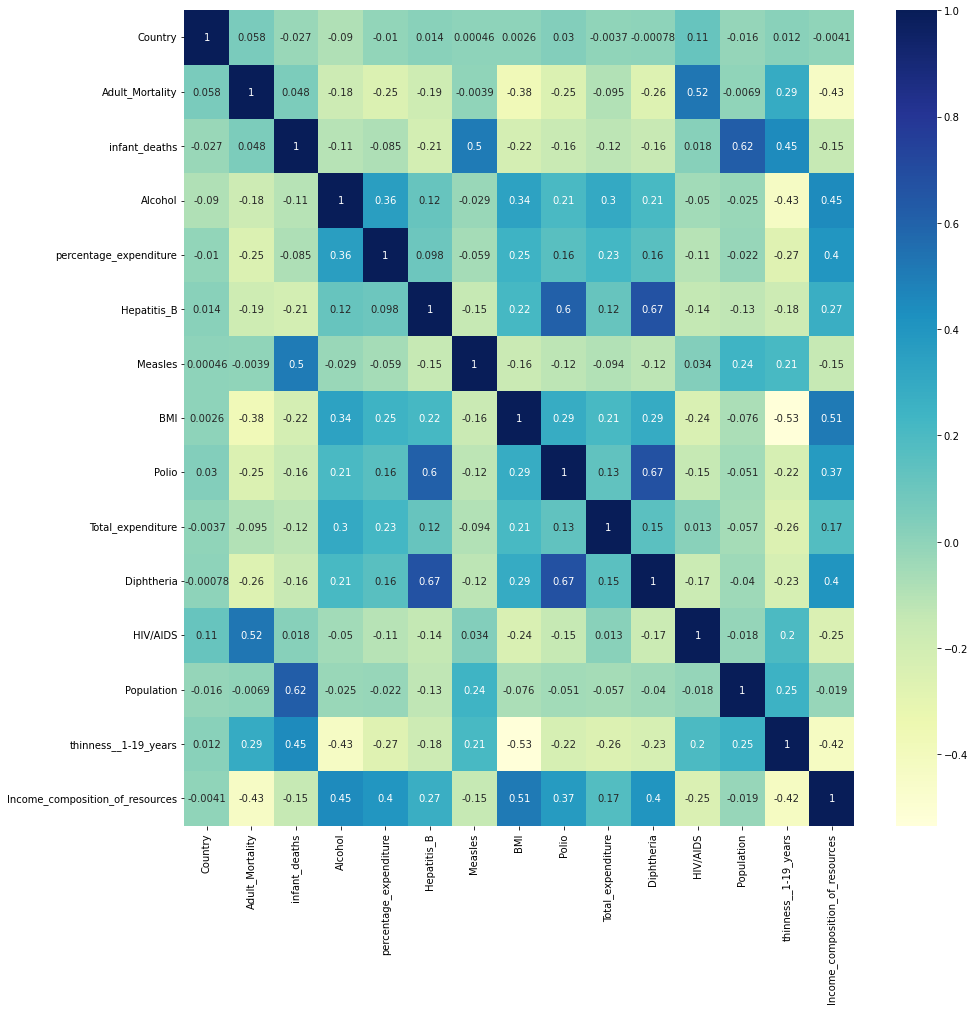

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="YlGnBu")

In [34]:
from sklearn import linear_model

In [35]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [36]:
print(regr.coef_)

[ 4.43180211e-03 -1.81041706e-02 -1.36119659e-03  1.42164130e-01
  4.24945975e-04 -1.41453818e-04 -2.59372632e-05  5.76810907e-02
  2.89344467e-02  8.37973279e-02  4.11489077e-02 -4.97313621e-01
  1.71258816e-09 -5.92457494e-02  1.42809421e+01]


In [37]:
regr.intercept_

54.69416190781631

In [38]:
predicted = regr.predict(X_test)
predicted

array([72.87021461, 61.04008622, 65.72687498, 56.516443  , 72.5017722 ,
       69.93569748, 76.10260955, 62.88124752, 68.33500079, 71.00747341,
       64.98266732, 71.27614802, 71.34408182, 81.16565097, 70.72347145,
       62.74209827, 64.02256661, 80.00238752, 72.7340542 , 72.09789283,
       72.45326228, 67.34745452, 74.17434391, 57.28723831, 67.92396319,
       69.81701476, 76.81922363, 61.92612522, 73.1494911 , 81.12650168,
       73.39183918, 76.11678841, 76.59039099, 75.01950498, 62.17376885,
       65.66763803, 61.19382216, 69.01381892, 76.77345534, 78.45479783,
       74.01657747, 61.10834195, 76.2895343 , 79.95180359, 69.18507958,
       76.44541755, 54.02418738, 61.62213556, 72.40853132, 75.58471998,
       76.76848694, 72.30773637, 75.2753606 , 61.17550276, 70.71008146,
       63.4471011 , 73.34282603, 60.19049248, 58.96961723, 73.68474115,
       75.54812637, 72.70017705, 64.14482672, 69.7790042 , 53.50296905,
       73.72375574, 70.73327961, 69.28805933, 39.67023531, 59.95

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

score=r2_score(y_test,predicted)
print('r2 socre is ',score)
print('mean_absolute_error is',mean_absolute_error(y_test,predicted))
print('mean_sqrd_error is',mean_squared_error(y_test,predicted))
print('root_mean_squared_error  of is',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is  0.7993458829880625
mean_absolute_error is 3.08940268832797
mean_sqrd_error is 17.66758103371761
root_mean_squared_error  of is 4.203282173934746
